In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
import math
from qiskit.circuit.library import MCXGate

x_reg = QuantumRegister(4,'x')
ancilla = QuantumRegister(5, "ancilla")
flip=QuantumRegister(1,"flip")
c = ClassicalRegister(4, 'c')

qc=QuantumCircuit(x_reg,ancilla,flip,c)

In [2]:
qc.x(flip)
qc.barrier()
qc.h(x_reg)
qc.h(flip)
qc.barrier()

for _ in range(3):
    # First Clause
    qc.cx(x_reg[0],ancilla[0])
    
    qc.barrier()
    
    # Second Clause
    qc.cx(x_reg[0],ancilla[1])
    qc.cx(x_reg[2],ancilla[1])
    qc.mcx(control_qubits=[x_reg[0], x_reg[2]], target_qubit=ancilla[1])
    
    qc.barrier()
    
    # Third Clause
    qc.x(x_reg[1])
    qc.cx(x_reg[1], ancilla[2])
    qc.x(x_reg[1])
       
    # Fourth Clause
    qc.x(x_reg[3])
    qc.cx(x_reg[3], ancilla[3])
    qc.x(x_reg[3])
    
    # Fifth Clause
    qc.cx(x_reg[2], ancilla[4])
    qc.cx(x_reg[3], ancilla[4])
    qc.mcx(control_qubits=[x_reg[2], x_reg[3]], target_qubit=ancilla[4])

    #Check for 5 clauses
    qc.x(ancilla[0])
    qc.x(ancilla[2])
    qc.mcx(control_qubits=[ancilla[0], ancilla[1], ancilla[2]], target_qubit=flip[0])
    qc.x(ancilla[0])
    qc.x(ancilla[2])
    qc.barrier()
    
    #Mirroing
    # First Clause
    qc.cx(x_reg[0],ancilla[0])
    
    qc.barrier()
    
    # Second Clause
    qc.cx(x_reg[0],ancilla[1])
    qc.cx(x_reg[2],ancilla[1])
    qc.mcx(control_qubits=[x_reg[0], x_reg[2]], target_qubit=ancilla[1])
    
    qc.barrier()
    
    # Third Clause
    qc.x(x_reg[1])
    qc.cx(x_reg[1], ancilla[2])
    qc.x(x_reg[1])
       
    # Fourth Clause
    qc.x(x_reg[3])
    qc.cx(x_reg[3], ancilla[3])
    qc.x(x_reg[3])
    
    # Fifth Clause
    qc.cx(x_reg[2], ancilla[4])
    qc.cx(x_reg[3], ancilla[4])
    qc.mcx(control_qubits=[x_reg[2], x_reg[3]], target_qubit=ancilla[4])

    #Check for 5 clauses
    qc.mcx(control_qubits=[ancilla[0], ancilla[1], ancilla[2], ancilla[3],ancilla[4]], target_qubit=flip[0])
    qc.barrier()
    
    
    #DIFFUSION
    qc.h(x_reg)
    qc.x(x_reg)
    qc.h(x_reg[-1])
    qc.mcx(control_qubits=[x_reg[0], x_reg[1], x_reg[2]], target_qubit=x_reg[3])
    qc.h(x_reg[-1])
    qc.x(x_reg)
    qc.h(x_reg)
    
qc.measure(qubit=[x_reg[0],x_reg[1],x_reg[2],x_reg[3]], cbit=[c[0],c[1],c[2],c[3]])

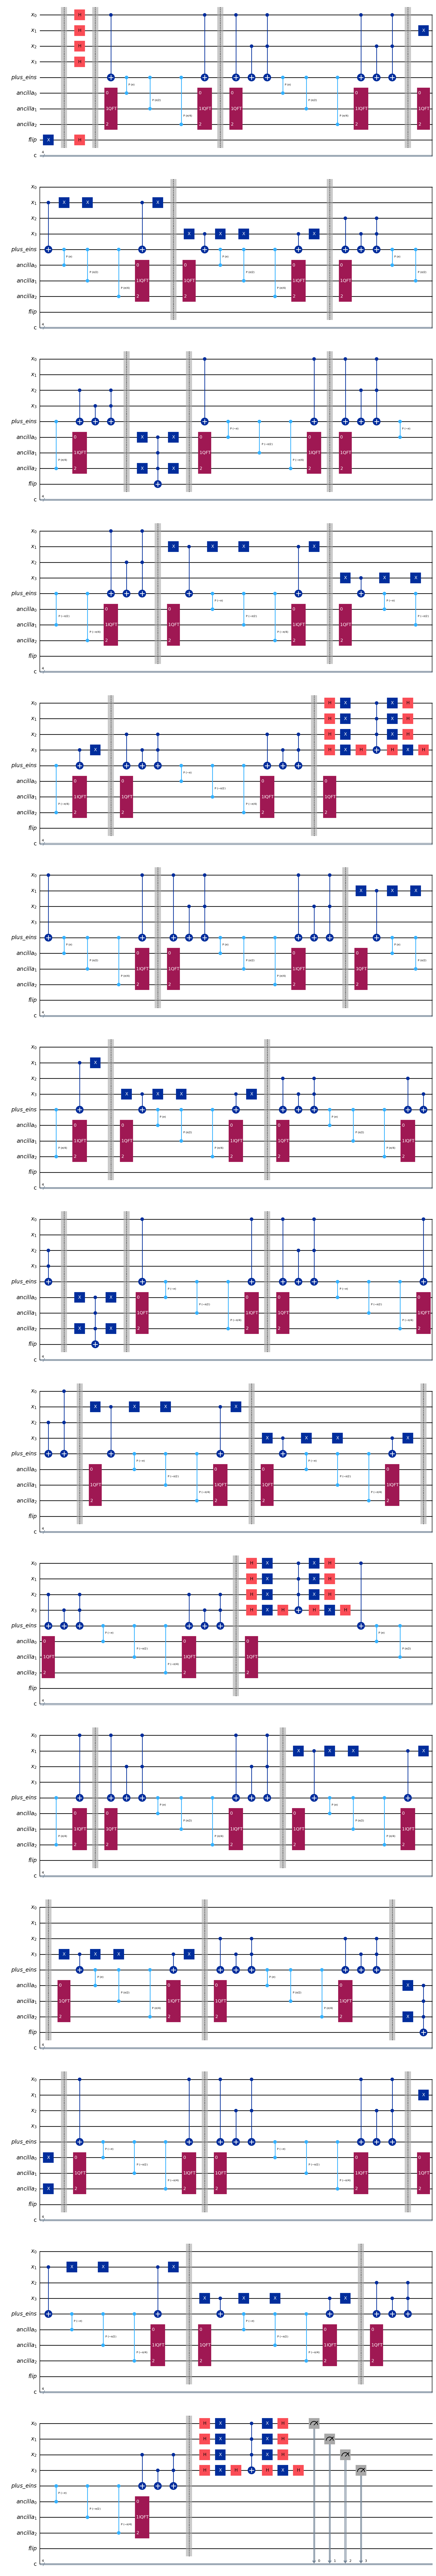

In [170]:
qc.draw('mpl')

In [3]:
from qiskit.primitives import Sampler
sampler = Sampler()
job = sampler.run(circuits=[qc], parameter_values=[[]], parameters=[[]])
job_result = job.result().quasi_dists[0]

In [4]:
job_result

{0: 0.0478515625, 1: 0.0478515625, 2: 0.0478515625, 3: 0.0478515625, 4: 0.0478515625, 5: 0.0478515625, 6: 0.165039062499999, 7: 0.0478515625, 8: 0.0478515625, 9: 0.0478515625, 10: 0.0478515625, 11: 0.0478515625, 12: 0.0478515625, 13: 0.0478515625, 14: 0.165039062499999, 15: 0.0478515625}

In [5]:
max_key = max(job_result, key=lambda k: job_result[k])
print("Key with the maximum value:", max_key)

Key with the maximum value: 6


ImportError: cannot import name 'ValidationInfo' from 'pydantic' (/Users/jakobmurauer/PycharmProjects/ING-DiBaAG-Hackathon/venv/lib/python3.11/site-packages/pydantic/__init__.cpython-311-darwin.so)